In [1]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import InceptionV3
# from tensorflow.keras import layers, models

# # Set your dataset path
# dataset_path = r'C:\Users\gopal\Downloads\final_year_project\Indian_Medicinal_Leave_ Image\Medicinal_Leaf_dataset\train'

# # Define parameters
# batch_size = 32
# image_size = (299, 299)  # InceptionV3 input size
# num_classes = 80

# # Data augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# train_generator = train_datagen.flow_from_directory(
#     dataset_path,
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # Load pre-trained InceptionV3 model
# base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# # Freeze the convolutional layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Build your custom model on top of InceptionV3
# model = models.Sequential()
# model.add(base_model)
# model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.02)
# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=80
# )

# # Save the model
# # model.save('custom_inceptionv3_model.h5')


In [2]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# plt.figure(figsize=(15,15))
# x_epochs = range(EPOCHS)

# plt.subplot(1, 2, 1)
# plt.plot(x_epochs, acc, label='Training Accuracy')
# plt.plot(x_epochs, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title("Training and Validation Accuracy")

# plt.subplot(1, 2, 2)
# plt.plot(x_epochs, loss, label='Training Loss')
# plt.plot(x_epochs, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title("Training and Validation Loss")

# plt.show()

In [3]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

In [13]:
data_dir = r'C:\Users\gopal\Downloads\final_year_project\Indian_Medicinal_Leaves_Image_Datasets\Medicinal_Leaf_dataset'
classes = [img_folder.name for img_folder in os.scandir(data_dir) if img_folder.is_dir()]
# for cl in classes:
#   imgs_path = os.path.join(data_dir, cl) 
#   imgs = glob.glob(imgs_path + '/*.jpg')
#   print(f"{cl}: {len(imgs)} Images")
#   train, val = imgs[:round(len(imgs) * 0.8)], imgs[round(len(imgs) * 0.8):] 

#   for t in train:
#     if not os.path.exists(os.path.join(data_dir, 'train', cl)): 
#       os.makedirs(os.path.join(data_dir, 'train', cl)) 
#     shutil.move(t, os.path.join(data_dir, 'train', cl))

#   for v in val:
#     if not os.path.exists(os.path.join(data_dir, 'val', cl)): 
#       os.makedirs(os.path.join(data_dir, 'val', cl)) 
#     shutil.move(v, os.path.join(data_dir, 'val', cl))


91


In [5]:
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

In [6]:
BATCH_SIZE = 32
IMG_SHAPE = 300

In [7]:
def PlotImages(imgs):
  dim = 3 #for a 3x3 of images
  plt.figure(figsize=(10, 10))
  for i in range(dim**2):
    plt.subplot(dim, dim, i+1)
    plt.imshow(imgs[i])

In [8]:
img_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    horizontal_flip=True,
    zoom_range=0.5,
    height_shift_range=0.15,
    width_shift_range=0.15,
    brightness_range=(0.5, 1.5),
    fill_mode='wrap'    
)

train_data_gen = img_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    shuffle=True,
    class_mode='categorical'
)

Found 10246 images belonging to 89 classes.


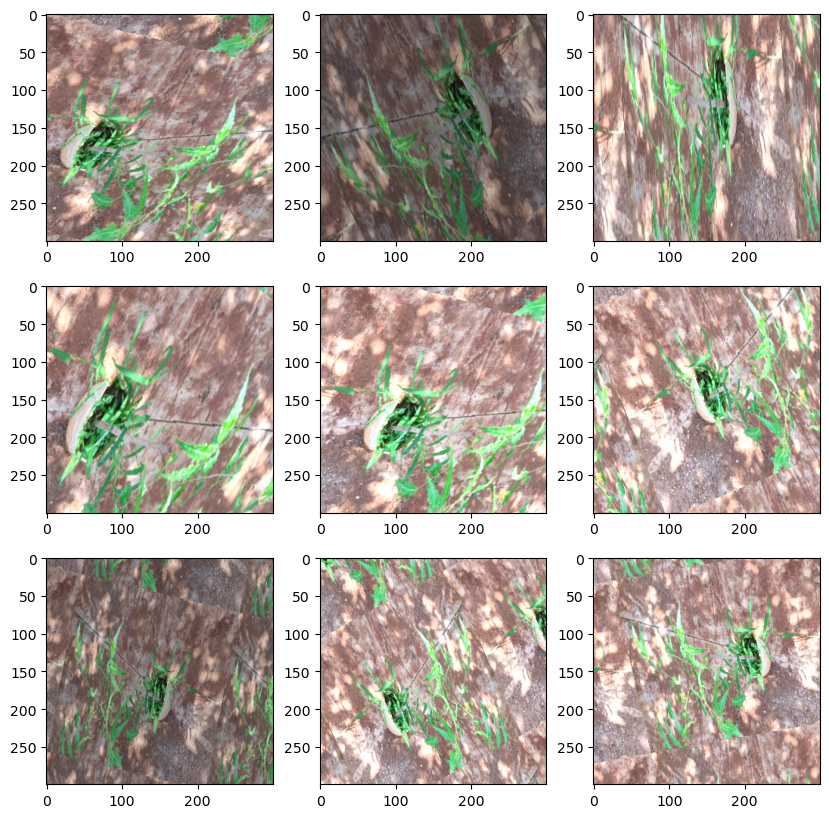

In [9]:
viz_imgs = [train_data_gen[0][0][0] for i in range(9)]
PlotImages(viz_imgs)

In [10]:
img_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = img_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=val_dir,
                                               target_size=(IMG_SHAPE, IMG_SHAPE),
                                               class_mode='categorical')

Found 2559 images belonging to 89 classes.


In [ ]:
# Load InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build your custom model on top of InceptionV3
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classes)-2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.02)

# Train the model with early stopping
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=50,  # Adjust the number of epochs as needed
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // BATCH_SIZE,
    callbacks=[early_stop]
)


Epoch 1/50
320/320 [==============================] - 1813s 6s/step - loss: 3.6456 - accuracy: 0.1519 - val_loss: 3.0878 - val_accuracy: 0.2603
Epoch 2/50
320/320 [==============================] - 1759s 5s/step - loss: 2.7013 - accuracy: 0.3174 - val_loss: 2.6359 - val_accuracy: 0.3430
Epoch 3/50
320/320 [==============================] - 1775s 6s/step - loss: 2.3588 - accuracy: 0.3775 - val_loss: 2.3768 - val_accuracy: 0.4153
Epoch 4/50
320/320 [==============================] - 2425s 8s/step - loss: 2.1151 - accuracy: 0.4297 - val_loss: 2.2043 - val_accuracy: 0.4604
Epoch 5/50
320/320 [==============================] - 2243s 7s/step - loss: 1.9697 - accuracy: 0.4691 - val_loss: 2.0372 - val_accuracy: 0.4873
Epoch 6/50
320/320 [==============================] - 1769s 6s/step - loss: 1.8809 - accuracy: 0.4901 - val_loss: 1.9801 - val_accuracy: 0.4909
Epoch 7/50
320/320 [==============================] - 1789s 6s/step - loss: 1.7740 - accuracy: 0.5138 - val_loss: 1.9240 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

# Train the model with early stopping

# Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


In [ ]:
# model.save('image_classification.keras')